# Project: No Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#resources">Resources</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset has information for 110,527 medical appointments in Brazil. It has 14 columns which are as follows:
>
1. PatientId: This is a unique identification number given to each patient.
2. AppointmentID: This is also a unique identification number for every scheduled appointment.
3. Gender: This column specifies the gender of the patient.
4. ScheduledDay: This is the date on which the appointment was scheduled by the hospital.
5. AppointmentDay: This is the date a patient is expected to visit the hospital.
6. Age: This column indicates the age of the patient.
7. Neighbourhood: This indicates the location of the hospital.
8. Scholarship: This column indicates whether a patient is enrolled in Brasilian welfare program (Bolsa Familia) or not.
9. Hipertension: This indicates whether the patient is hypertensive or not. This has '0' and '1' status. Where '0' is for patients that are not hypertensive and '1' is for patients that are hypertensive.
10. Diabetes: This indicates whether the patient is diabetics or not. This has '0' and '1' status. Where '0' is for patients that are not diabetics and '1' is for patients that are diabetics.
11. Alcoholism: This indicates whether the patient is an alcoholic or not. This has '0' and '1' status. Where '0' is for patients that are not alcoholic and '1' is for patients that are alcoholic.
12. Handicap: This indicates whether the patient is physically challenge or not. it has numbers from '1' to '4'. '1' indicates that a patient has 1 physical challenge while '2', '3' and '4' indicates that the patient has 2, 3, 4 physically challenges respectively.
13. SMS_received: This indicates whether an SMS message was sent out to the patient or not. it has '0' and '1' values, where '0' is for patients that did not receive SMS message and '1' is for those that received SMS messages.
14. No-show: This column indicates whether a patient actually visited the hospital on the day of appointment or not. It has 'Yes' and 'No' values, where 'Yes' is for patients that did not show up for their appointments and 'No' is for patients that showed up for their appointments.
>
The purpose of this investigation is to analyse the dataset and come up with factors that could be responsible for patients not showing up for their appointments. This will help the hospitals to manage their staff in case patients did not show up as predicted. The dependent variable in the dataset is the No-show column because it depends on other variables, while the independent variables are Age, Scholarship, Hypertension, Diabetes, Handicap, Alcoholism and SMS_received. These independent variables could be responsible for the outcome of the dependent variable. Therefore, a patient showing up or not could depend on their age, gender, enrollment in Brasilian Welfare Program (Bolsa Familia), their health status (hypertensive, diabetics or handicap), their level of alcohol intake and wether he or she received SMS message, as a reminder, or not. 
> 
In this investigation, the following variables will be analysed to determine the factors we need to consider in order to know if a patient will show up for his or her appointment or not:
<ol>
<li> Dependent variable: No-show </li>
<li> Independent variables: Age, Scholarship and SMS_received.</li>
</ol>

The following are questions to be considered in this investigation:
<ol>
<li> How many of the patients who showed up for their appointments are over 20 years?</li>
<li> How many of the patients who showed up for their appointments are on Brasilian Welfare Program (Bolsa Familia)</li>
<li> How many patients showed up after receiving a reminder in form of SMS messages?</li>
</ol>


In [3]:
# Use import statements to import all the libraries needed for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In this section, the data will be loaded, few lines will be printed out. We will perform operations to inspect data types. We will also look for instances of missing or possibly errant data.


In [4]:
# Read the dataset
data = pd.read_csv('medical_appointments.csv')
no_show_df = data.copy()

Let's look at the general information about the dataset. This will give us the following:
1. Number of columns in the dataset
2. The total data entries
3. The data type of each column

In [5]:
# This will return general information about the dataset.
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset has 110,527 entries, 14 columns and no missing data.
The data types of all the columns are also displayed. 

There is need to display the dataset. This is will help us to inspect 
the naming convention of the columns and identify those that need to be renamed.
It will also help us to identify if there is need to change the data type or format of any column.

In [6]:
# This section displays the first few rows of the dataset.
no_show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Observations: The following are observed in the above output;
    1. There is need to rename the columns for the sake of consistency
    2. The datetime on ScheduledDay and AppointmentDay are in string rather than datetime format

In [7]:
# There is need to describe the attributes of the dataset, using describe(). 
# Such attribute include count, mean, standard deviation, minimum value, maximum value, 25%, 50% and 75% percentile

no_show_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Observations: The following were observed from the above output;
1. The minimum value for age is -1. This is not acceptable as age cannot be counted in negative. 
2. The maximum value for age is 115, this can be allowed because there may be one or two persons above the life expectancy in a country
3. The number entries (110,527) was uniform across board indicating that there were no missing data.
4. The maximum value under the column handicap is 4. 
5. Age should be in integer and not float.


### Data Cleaning: In this section, we will proceed to clean the data by addressing all the issues raised in our observations above 

In [8]:
# After discussing the structure of the data and any problems that need to be
# cleaned, perform those cleaning steps in the second part of this section.
no_show_df = no_show_df.rename(columns={'PatientId':'patient_id','AppointmentID':'appointment_id',
                                       'Gender':'gender', 'ScheduledDay':'scheduled_day',
                                       'AppointmentDay':'appointment_day', 'Age':'age', 
                                       'Neighbourhood':'neighbourhood', 'Scholarship':'scholarship',
                                       'Hipertension':'hypertension', 'Diabetes':'diabetes',
                                       'Alcoholism':'alcoholism', 'Handcap':'handicap',
                                       'SMS_received':'sms_received', 'No-show':'no_show'})

In [9]:
# We need to know if the columns have been renamed. 
# The code snippet will display the head of the dataset again to reveal the new names 
no_show_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The output above shows that all the column names have changed to new ones 

The ScheduledDay(now scheduled_day) and AppointmentDay(now appointment_day) are string.
The section below will convert from string to datetime

In [10]:
# Convert date under scheduled_day and appointment_day from string to datetime
no_show_df['scheduled_day'] = pd.to_datetime(no_show_df['scheduled_day'])
no_show_df['appointment_day'] = pd.to_datetime(no_show_df['appointment_day'])

In [11]:
# This code below will display the dataset to confirm if the date under scheduled_day 
# and appointment_day has changed from string to datetime
no_show_df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110527 non-null  float64            
 1   appointment_id   110527 non-null  int64              
 2   gender           110527 non-null  object             
 3   scheduled_day    110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   scholarship      110527 non-null  int64              
 8   hypertension     110527 non-null  int64              
 9   diabetes         110527 non-null  int64              
 10  alcoholism       110527 non-null  int64              
 11  handicap         110527 non-null  int64              
 12  sms_received     110527 non-null  int64              
 13 

In the output above, the date under 'scheduled_day' and 'appointment_day' has 
changed from string to datetime. This will ease our analysis.   

The next issue is to remove the outlier. 
The negative value under 'age' is not an acceptable age.

In [13]:
no_show_df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There is need to remove the rows that contain -1 because age can never be negative.

In [14]:
# This section collate all index with 'age' < 0 and save them as outlier_age 
outlier_below = no_show_df[no_show_df['age'] < 0].index
outlier_below

Int64Index([99832], dtype='int64')

In [15]:
# This section drop all the rows that contain such values
no_show_df.drop(outlier_below, inplace=True)

In [16]:
# We need to run the code below to confirm whether the rows has been removed or not
no_show_df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [17]:
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110526 non-null  float64            
 1   appointment_id   110526 non-null  int64              
 2   gender           110526 non-null  object             
 3   scheduled_day    110526 non-null  datetime64[ns, UTC]
 4   appointment_day  110526 non-null  datetime64[ns, UTC]
 5   age              110526 non-null  int64              
 6   neighbourhood    110526 non-null  object             
 7   scholarship      110526 non-null  int64              
 8   hypertension     110526 non-null  int64              
 9   diabetes         110526 non-null  int64              
 10  alcoholism       110526 non-null  int64              
 11  handicap         110526 non-null  int64              
 12  sms_received     110526 non-null  int64              
 13 

The output above reveals that out of 110527 data entries, 1 row had values below 0. 
We are left with 110526 entries.

Next we will take a look at the outliers above the life expextancy in Brazil.
Life expectancy is currently 76 years according to world bank(2018)

In [18]:
# How many patients' age are above life expectancy in Brazil
outlier_over = no_show_df[no_show_df['age'] >= 76].index
outlier_over

Int64Index([     5,     34,     38,     44,    189,    190,    243,    281,
               296,    325,
            ...
            110271, 110275, 110288, 110453, 110456, 110468, 110471, 110476,
            110488, 110497],
           dtype='int64', length=5392)

There are 5,392 patients above the life expectancy in Brazil.

In [19]:
# This section drop all the rows that contain such values
no_show_df.drop(outlier_over, inplace=True)

In [20]:
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105134 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       105134 non-null  float64            
 1   appointment_id   105134 non-null  int64              
 2   gender           105134 non-null  object             
 3   scheduled_day    105134 non-null  datetime64[ns, UTC]
 4   appointment_day  105134 non-null  datetime64[ns, UTC]
 5   age              105134 non-null  int64              
 6   neighbourhood    105134 non-null  object             
 7   scholarship      105134 non-null  int64              
 8   hypertension     105134 non-null  int64              
 9   diabetes         105134 non-null  int64              
 10  alcoholism       105134 non-null  int64              
 11  handicap         105134 non-null  int64              
 12  sms_received     105134 non-null  int64              
 13 

#### The next parameter to check is duplicate rows. It is important to identify and remove duplicate rows

In [21]:
# We need to sort the duplicated rows using duplicated() 
duplicated_row = no_show_df[no_show_df.duplicated()]
duplicated_row

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


The output above indicates there are no duplicated rows in the dataset. 
It is time to dive into Exploratory Data Analysis (EDA) of our dataset.

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: How many of the patients who showed up for their appointments are over 20 years?

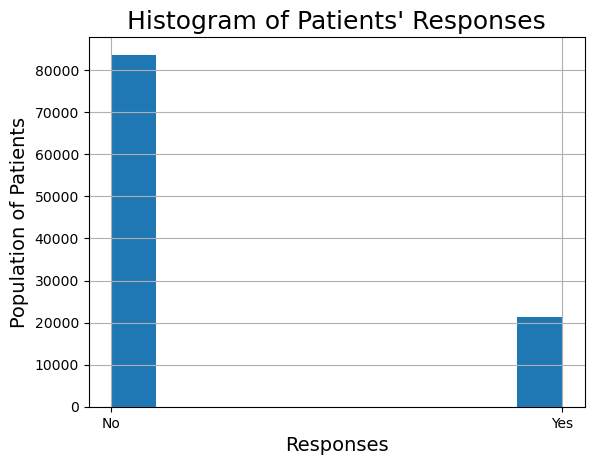

In [22]:
# We need to determine how many patients showed up for their appointments
no_show_df.no_show.hist()
plt.xlabel('Responses', fontsize=14)
plt.ylabel('Population of Patients' , fontsize=14)
plt.title("Histogram of Patients' Responses", fontsize=18);


In [23]:
# Total number of patients that showed up for their appointments
present = no_show_df.query('no_show == "No"', inplace=False).no_show.count()

# Total number of patients that could not show up for their appointments
absent = no_show_df.query('no_show == "Yes"', inplace=False).no_show.count()

print("present = ", present)
print("absent = ", absent)
print("Total = ", present + absent)

present =  83685
absent =  21449
Total =  105134


The output above revealed that 83,685 patients showed up for their appointments 
while 21,449 did now show up for their appointments. The total number of patients is 105,134.   

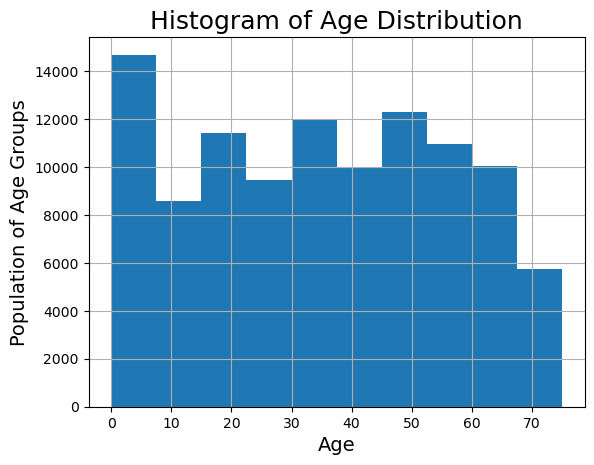

In [24]:
# We need to draw histogram to show age distribution in the dataset
no_show_df.age.hist()
plt.xlabel('Age', fontsize=14)
plt.ylabel('Population of Age Groups' , fontsize=14)
plt.title('Histogram of Age Distribution', fontsize=18);


The histogram above shows the graphical age distribution of the dataset.

In [25]:
# The number of patients that are below age 20 
young = no_show_df.query('age < 20', inplace=False).no_show.count()

# The number of patients between age 20 and 50
adult = no_show_df.query('20 <= age <= 50', inplace=False).no_show.count()

# The number of patients that are above age 50
senior_citizens = no_show_df.query('age > 50', inplace=False).no_show.count()

print("Young = ", young)
print("Adult = ", adult)
print("Senior citizens = ", senior_citizens)
print("Total = ", young + adult + senior_citizens)

Young =  30411
Adult =  44692
Senior citizens =  30031
Total =  105134


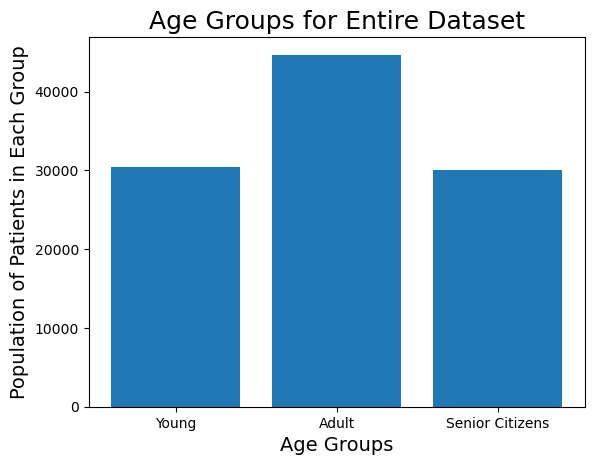

In [26]:
# We need to plot the bar chart for age groups in the entire dataset
x = [1, 2, 3]
y = [young, adult, senior_citizens]

plt.bar(x, y, tick_label=['Young', 'Adult', 'Senior Citizens'])

plt.xlabel('Age Groups', fontsize=14)
plt.ylabel('Population of Patients in Each Group' , fontsize=14)
plt.title('Age Groups for Entire Dataset', fontsize=18);
plt.show();

The following are the observations from the above histogram:
1. Patients that are below 20 years of age are 30,411
2. Between 20 and 50 years are 44,692
3. Above 50 years of age are 30,031

Its time to create a determine the patients that actually showed up for 
their appointments and their age distribution.  
Remember 83,685 was the total number of patients that were present for their appointments.

In [27]:
# We need to perform query() operation on patients that showed up for their appointments
# The number of patients who showed up and are below age 20 
young_present = no_show_df.query("age < 20  and no_show == 'No'", inplace=False).no_show.count()

# The number of patients who showed up and are between age 20 and 50
adult_present = no_show_df.query("20 <= age <= 50 and no_show == 'No'", inplace=False).no_show.count()

# The number of patients who showed up and are above age 50
senior_citizens_present = no_show_df.query("age > 50 and no_show == 'No'", inplace=False).no_show.count()

print("Young present = ", young_present)
print("Adult present = ", adult_present)
print("Senior citizens present = ", senior_citizens_present)
print("Total present=", young_present + adult_present + senior_citizens_present)

Young present =  23670
Adult present =  34841
Senior citizens present =  25174
Total present= 83685


Out of the 88,207 patients that showed up for their appointments, the following can observed:
    1. 23,670 young persons below age 20 were present.
    2. 34,841 adults between age 20 and 50 were present.
    3. 29,696 senior citizens above age 50 were present.

It's time to plot the bar chart for the patients that actually showed up for their appointments

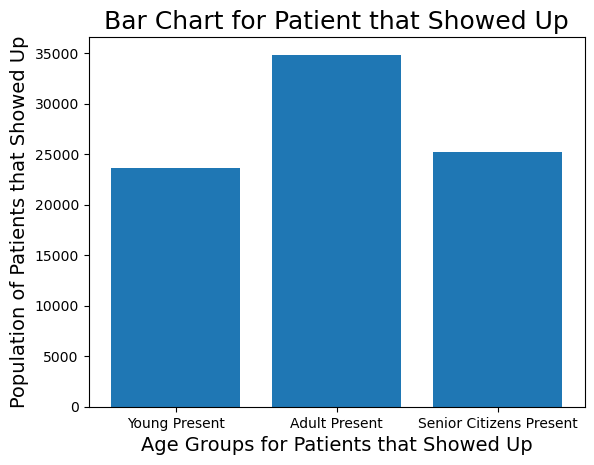

In [28]:
# Plot bar chart for age groups of patients that showed up for their appointments 
x = [1, 2, 3]
y = [young_present, adult_present, senior_citizens_present]

plt.bar(x, y, tick_label=['Young Present', 'Adult Present', 'Senior Citizens Present'])

plt.xlabel('Age Groups for Patients that Showed Up', fontsize=14)
plt.ylabel('Population of Patients that Showed Up' , fontsize=14)
plt.title('Bar Chart for Patient that Showed Up', fontsize=18);


The bar chart above is a replica of what was obtained for the entire dataset.
However, we need to calculate the percentage of patients that showed up in each age group.

In [29]:
# Determine the percentage of patients that showed for each group
# Percentage for young patients
young_present_percent = (young_present/(young_present + adult_present + senior_citizens_present)) * 100 

# Percentage for adult patients
adult_present_percent = (adult_present/(young_present + adult_present + senior_citizens_present)) * 100 

# Percentage for senior citizens patients
senior_present_percent = (senior_citizens_present/(young_present + adult_present + senior_citizens_present)) * 100 

# print the output as integers
print(round(float(young_present_percent), 2),"% of young people showed up for their appointments.")
print(round(float(adult_present_percent), 2),"% of adults showed up for their appointments.")
print(round(float(senior_present_percent), 2),"% of senior citizens showed up for their appointments.")

28.28 % of young people showed up for their appointments.
41.63 % of adults showed up for their appointments.
30.08 % of senior citizens showed up for their appointments.


Adults and senior citizens have the highest percentage of patients that showed up for their appointments.
71.71% patients that are above 20 years showed up for their appointments.

### Research Question 2: How many of the patients who showed up for their appointments are on Brasilian Welfare Program (Bolsa Familia)

We need to determine the patients that are on Bolsa Familia and those are not on the program

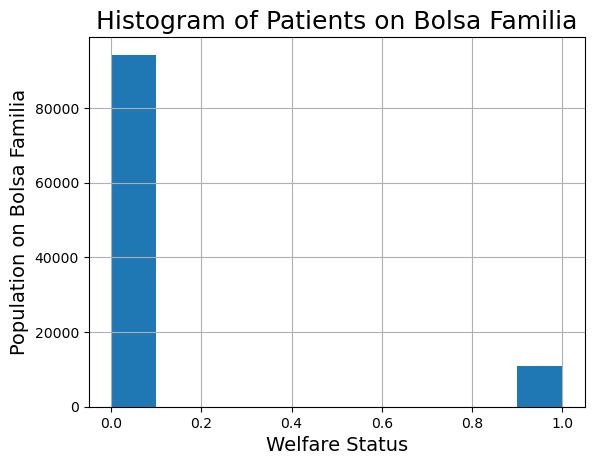

In [30]:
# We need to first draw a histogram to show welfare participation distribution in the dataset
no_show_df.scholarship.hist()
plt.xlabel('Welfare Status', fontsize=14)
plt.ylabel('Population on Bolsa Familia' , fontsize=14)
plt.title('Histogram of Patients on Bolsa Familia', fontsize=18);


Let us now determine the exact number of patients that are on the welfare program or not

In [31]:
# Total number of patients that are on Bolsa Familia
welfare = no_show_df.query("scholarship == 1", inplace=False).scholarship.count()

# Total number of patients that are not on Bolsa Familia
no_welfare = no_show_df.query("scholarship == 0", inplace=False).scholarship.count()

print("Welfare = ", welfare)
print("No Welfare = ", no_welfare)
print("Total = ", welfare + no_welfare)


Welfare =  10840
No Welfare =  94294
Total =  105134


>From the output above, the following can be observed:
>
>    1. Total numbers of patients on Bolsa Familia were 10,840
>   2. Total numbers of patients not on Bolsa Familia were 94,294

We will now determine how many patients on Bolsa Familia showed up for their appointments.
We will also determine how many of them on the program that did not show up

In [32]:
# We need to perform query() operation on patients that showed up for their appointments
# These patients are also on Bolsa Familia
# Patients on Bolsa Familia that also showed up for appointments
welfare_present = no_show_df.query("scholarship == 1  and no_show == 'No'", inplace=False).scholarship.count()

# Patients on Bolsa Familia that did not showe up for appointments
welfare_absent = no_show_df.query("scholarship == 1  and no_show == 'Yes'", inplace=False).scholarship.count()

print("Welfare Present = ", welfare_present)
print("Welfare Absent = ", welfare_absent)

print("Total Welfare =", welfare_present + welfare_absent)

Welfare Present =  8263
Welfare Absent =  2577
Total Welfare = 10840


The total number of patients on welfare tally with the number gotten above which is 10,840

>These are the observations from the output above:
 >
 >1. 8,263 patients on Bolsa Familia showed up for their appointments.
 >
 >2. 2,577 patients on Bolsa Familia  did not show up for their appointments.

Let us now plot the bar chart for the output above.

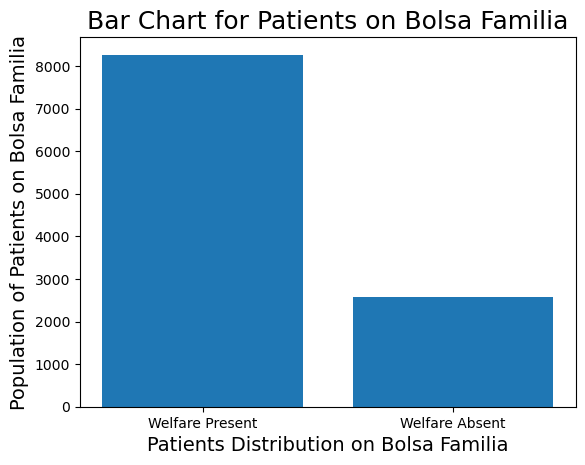

In [33]:
# Plot bar chart for age groups of patients that showed up for their appointments 
x = [1, 2]
y = [welfare_present, welfare_absent]

plt.bar(x, y, tick_label=['Welfare Present', 'Welfare Absent'])

plt.xlabel('Patients Distribution on Bolsa Familia', fontsize=14)
plt.ylabel('Population of Patients on Bolsa Familia' , fontsize=14)
plt.title('Bar Chart for Patients on Bolsa Familia', fontsize=18);


In [34]:
# Determine the percentage of patients on Bolsa Familia that did showed up for their appointments
welfare_present_percent = (welfare_present/(welfare_present + welfare_absent)) * 100 

# Determine the percentage of patients on Bolsa Familia that did not showed up for their appointments
welfare_absent_percent = (welfare_absent/(welfare_present + welfare_absent)) * 100 

# print the output to decimal place
print(round(float(welfare_present_percent), 2),"% of patients on Bolsa Familia showed up for appointments.")
print(round(float(welfare_absent_percent), 2),"% of patients on Bolsa Familia did not show up for appointments.")


76.23 % of patients on Bolsa Familia showed up for appointments.
23.77 % of patients on Bolsa Familia did not show up for appointments.




#### 76.23% of patients on Bolsa Familia showed up for their appointments while 23.77% did not show up. This means that larger percentage of patients on Bolsa Familia understand the value of healthcare and hence they showed up for their appointments.


### Research Question 3: How many patients showed up after receiving a reminder in form of SMS messages?

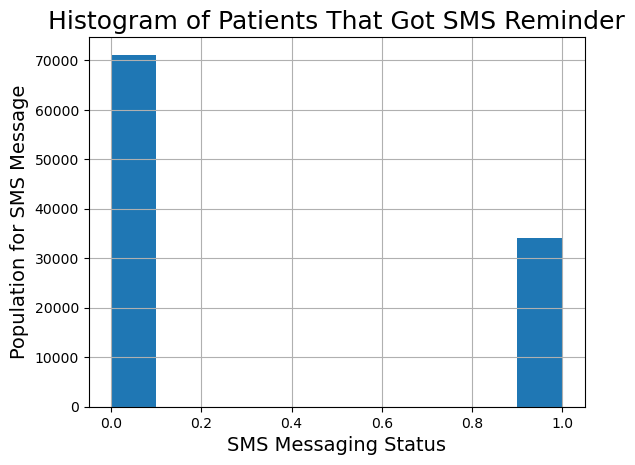

In [35]:
# We need to first draw a histogram to show the number of 
# patients that receive a reminder in form of SMS message
no_show_df.sms_received.hist()
plt.xlabel('SMS Messaging Status', fontsize=14)
plt.ylabel('Population for SMS Message' , fontsize=14)
plt.title('Histogram of Patients That Got SMS Reminder', fontsize=18);


Let us find out how many patients actually received SMS messages and how many did not. 

In [36]:
# Total number of patients that received SMS messages 
reminder = no_show_df.query("sms_received == 1", inplace=False).sms_received.count()

# Total number of patients that did not received SMS messages 
no_reminder = no_show_df.query("sms_received == 0", inplace=False).sms_received.count()

print("Reminder = ", reminder)
print("No Reminder = ", no_reminder)
print("Total = ", reminder + no_reminder)

Reminder =  34004
No Reminder =  71130
Total =  105134


The output above shows that the SMS messages sent to patients as reminders are not enough. 
71,130 patients did not receive them.

>Observations: The following are observed from the output above:
>
>1. 34,004 patients received SMS messages as reminders for their appointments
>2. 71,130 patients did not received SMS messages as reminders for their appointments

We will now proceed to analyse the effects of SMS received on patients keeping their appointments.

In [44]:
# We need to perform query() operation on patients that showed up for their appointments
# because of SMS messages received

# Patients that received SMS messages and showed up for their appointments
sms_present = no_show_df.query("sms_received == 1  and no_show == 'No'", inplace=False).sms_received.count()

# Patients that received SMS messages and did not show up for their appointments
sms_absent = no_show_df.query("sms_received == 1  and no_show == 'Yes'", inplace=False).sms_received.count()

print("SMS Present = ", sms_present)
print("SMS Absent = ", sms_absent)

print("Total SMS =", sms_present + sms_absent)

SMS Present =  24524
SMS Absent =  9480
Total SMS = 34004


The total sms tally with the total in the previous session, which is 34,004

>Observations on the output above:
>
>1. 24,524 received SMS messages and showed up for their appointments
>
>2. 9480 received SMS messages and did not show up for their appointments

We need to visualize the output above on a bar chart

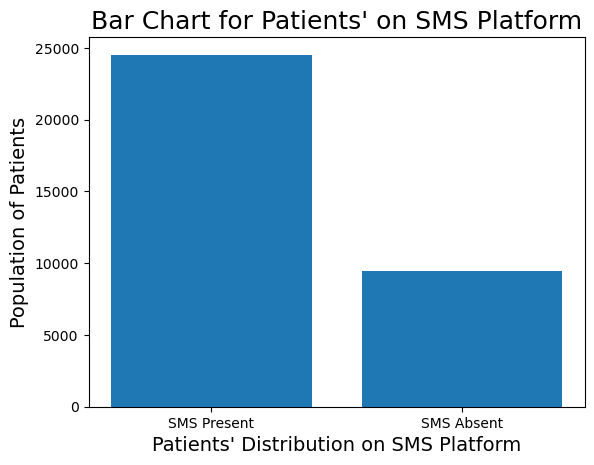

In [45]:
# Plot bar chart for patients regarding wether they receive SMS message or not 
x = [1, 2]
y = [sms_present, sms_absent]

plt.bar(x, y, tick_label=['SMS Present', 'SMS Absent'])

plt.xlabel("Patients' Distribution on SMS Platform", fontsize=14)
plt.ylabel('Population of Patients' , fontsize=14)
plt.title("Bar Chart for Patients' on SMS Platform", fontsize=18);

In [46]:
# Determine the percentage of patients on who received SMS message and showed up for their appointments
sms_present_percent = (sms_present/(sms_present + sms_absent)) * 100 

# Determine the percentage of patients on who received SMS message and did not show up for their appointments
sms_absent_percent = (sms_absent/(sms_present + sms_absent)) * 100 

# print the output to decimal place
print(round(float(sms_present_percent), 2),"% of patients received SMS messages and showed up for appointments.")
print(round(float(sms_absent_percent), 2),"% of patients received SMS messages and did not show up for appointments.")

72.12 % of patients received SMS messages and showed up for appointments.
27.88 % of patients received SMS messages and did not show up for appointments.


##### 72.12% of patients that received SMS messages as reminders showed up for their appointments, while 27.88% received SMS messages as reminders but did not show up for their appointments. We recomend that the hospital continue to send reminders to patients in form of SMS messages.

#### We will now save the edited dataset to reflect all the changes.

In [47]:
# We now save the edited dataset as no_show_appointments_edited.csv
no_show_df.to_csv('no_show_appointments_edited.csv', index=False)

<a id='conclusions'></a>
## Conclusions


The following are the conclusions we can draw from analysing the dataset above:
1. Since 71.71% (adult-41.63% + senior citizens-30.08%) of patients that showed up for their appointments are of age 20 and above. There is high likelihood that someone in these age ranges will show up for their appontments. 
2. 76.23% of patients on Bolsa Familia showed up for their appointments. Patients that are enrolled in the welfare program will likely show up for their appointments.
3. 71,130 out of 105,134 did not get reminders in form of SMS messages. 34,004 patients got reminders, out which 72.12% showed up for their appointments. It is possible that the number of patients that showed up for their appointment would have increased if the health care system invest more in notifying patients of their appointments at the hospitals.  


## Limitations
Below are the limitations of this projects:
1. The row with negative age of -1 was removed, which can as well be replaced with the mean age.
2. There are 5,392 patients above the life expectancy in Brazil. These patients were also not removed or replaced with mean age because in real life there may be some people which are actually above the life expectancy age. 


Student's activity on 29/09/2023
1. Using the Prosper dataset, identify your dependent variable and independent variables
2. Generate 3 research questions and answer them with your analysis

<a id='resources'></a>
## Resources

 > The following are the list of resources:
      >  1. https://stackoverflow.com/questions/455612/limiting-floats-to-two-decimal-points
      >
      > 2. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html
      >
      > 3. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html
      >
      > 4. https://www.geeksforgeeks.org/python-pandas-dataframe-count/
      >
      > 5. https://medium.com/@nathancook_36247/pandas-dataframe-query-method-with-f-strings-b7ba272ff188
      >
      > 6. https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/
      >
      > 7. https://python-graph-gallery.com/4-add-title-and-axis-label/
      >
      > 8. https://matplotlib.org/tutorials/text/text_props.html
      >
      > 9. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
      > 10. https://data.worldbank.org/indicator/SP.DYN.LE00.IN?locations=BR